<a href="https://colab.research.google.com/github/WarunaDissanayake1234/Face-Mask-Detection-using-Convolutional-Neural-Network./blob/main/Face_Mask_Detection_using_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face Mask Detection Dataset![Screenshot 2024-01-01 184354.png](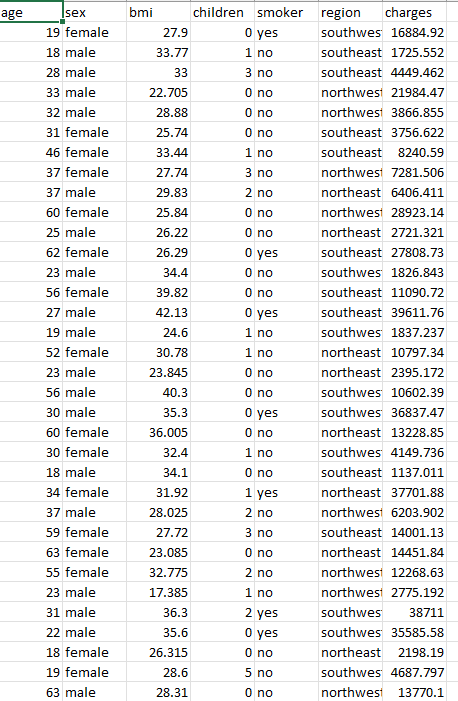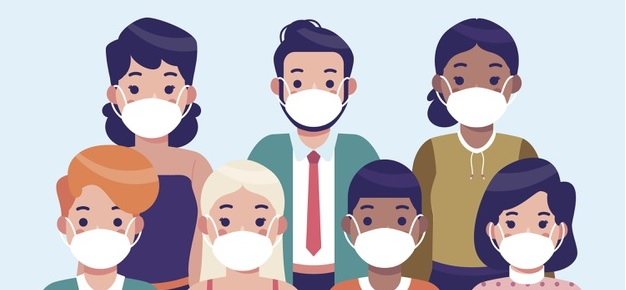) : https://www.kaggle.com/datasets/omkargurav/face-mask-dataset

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 96% 157M/163M [00:01<00:00, 192MB/s]
100% 163M/163M [00:01<00:00, 140MB/s]


In [ ]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing dependancies

create labels

process the images

split in training and testing data

traing CNN model

build a predictive system

Importing the dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1450.jpg', 'with_mask_22.jpg', 'with_mask_3609.jpg', 'with_mask_2824.jpg', 'with_mask_270.jpg']
['with_mask_1936.jpg', 'with_mask_1130.jpg', 'with_mask_2017.jpg', 'with_mask_2131.jpg', 'with_mask_2482.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[-5:])

['without_mask_3423.jpg', 'without_mask_1875.jpg', 'without_mask_1555.jpg', 'without_mask_2822.jpg', 'without_mask_272.jpg']


In [ ]:
# number of mask and without mask

print(len(with_mask_files))
print(len(without_mask_files))


3725
3828


creating the labels for the two class of Images

with mask --> 1

without mask --> 0



In [ ]:
# creat the labels

with_mask_label = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_files[0:5])
print(without_mask_files[0:5])

['with_mask_1450.jpg', 'with_mask_22.jpg', 'with_mask_3609.jpg', 'with_mask_2824.jpg', 'with_mask_270.jpg']
['without_mask_2339.jpg', 'without_mask_3144.jpg', 'without_mask_1646.jpg', 'without_mask_3607.jpg', 'without_mask_3476.jpg']


In [ ]:
labels = with_mask_label + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

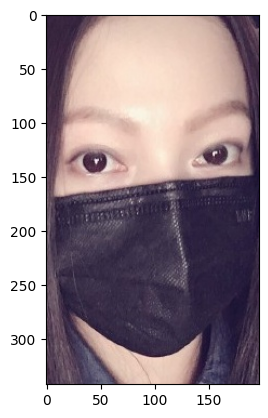

In [ ]:
# Displayning with mask image

img = mpimg.imread('/content/data/with_mask/with_mask_22.jpg')
imgplot = plt.imshow(img)
plt.show()

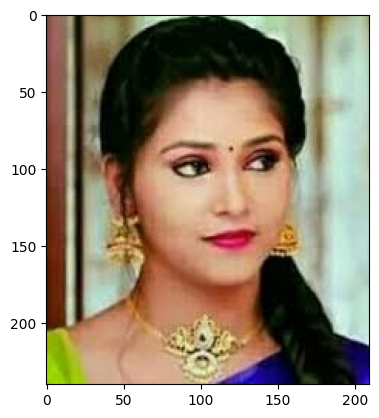

In [ ]:
# Displayning without mask image

img = mpimg.imread('/content/data/without_mask/without_mask_1555.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resize the Images

2. Convert the Images to numpy array

In [ ]:
with_mask_path = '/content/data/with_mask/'
data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128, 128), Image.NEAREST)
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128, 128), Image.NEAREST)
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy array

X = np.array(data)
Y = np.array(labels)


In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train Test Split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the images

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
print(X_train[0])

[[[ 61  66  62]
  [ 59  64  60]
  [ 54  59  55]
  ...
  [234 237 226]
  [235 234 229]
  [236 234 235]]

 [[ 53  55  52]
  [ 53  55  52]
  [ 53  55  52]
  ...
  [231 237 227]
  [235 236 230]
  [236 234 235]]

 [[ 54  54  52]
  [ 54  54  52]
  [ 50  50  48]
  ...
  [233 238 231]
  [234 235 230]
  [236 234 235]]

 ...

 [[ 56  57  49]
  [ 68  68  60]
  [ 82  73  64]
  ...
  [ 67  75  78]
  [ 61  66  70]
  [ 75  76  81]]

 [[ 60  60  52]
  [ 69  66  59]
  [ 80  73  63]
  ...
  [ 99 103 112]
  [ 85  89 100]
  [ 87  89 101]]

 [[ 68  64  61]
  [ 71  68  61]
  [ 76  74  61]
  ...
  [ 84  86  99]
  [100  98 119]
  [108 109 127]]]


In [34]:
print(X_train_scaled[0])

[[[0.23921569 0.25882353 0.24313725]
  [0.23137255 0.25098039 0.23529412]
  [0.21176471 0.23137255 0.21568627]
  ...
  [0.91764706 0.92941176 0.88627451]
  [0.92156863 0.91764706 0.89803922]
  [0.9254902  0.91764706 0.92156863]]

 [[0.20784314 0.21568627 0.20392157]
  [0.20784314 0.21568627 0.20392157]
  [0.20784314 0.21568627 0.20392157]
  ...
  [0.90588235 0.92941176 0.89019608]
  [0.92156863 0.9254902  0.90196078]
  [0.9254902  0.91764706 0.92156863]]

 [[0.21176471 0.21176471 0.20392157]
  [0.21176471 0.21176471 0.20392157]
  [0.19607843 0.19607843 0.18823529]
  ...
  [0.91372549 0.93333333 0.90588235]
  [0.91764706 0.92156863 0.90196078]
  [0.9254902  0.91764706 0.92156863]]

 ...

 [[0.21960784 0.22352941 0.19215686]
  [0.26666667 0.26666667 0.23529412]
  [0.32156863 0.28627451 0.25098039]
  ...
  [0.2627451  0.29411765 0.30588235]
  [0.23921569 0.25882353 0.2745098 ]
  [0.29411765 0.29803922 0.31764706]]

 [[0.23529412 0.23529412 0.20392157]
  [0.27058824 0.25882353 0.23137255]


Building a Convolutional Neural Networks(CNN)

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))



In [38]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [39]:
# Training the neural network

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 11s 24ms/step - loss: 0.5001 - acc: 0.7708 - val_loss: 0.2760 - val_acc: 0.8694
Epoch 2/10
170/170 [==============================] - 3s 18ms/step - loss: 0.2940 - acc: 0.8788 - val_loss: 0.2567 - val_acc: 0.8959
Epoch 3/10
170/170 [==============================] - 4s 21ms/step - loss: 0.2411 - acc: 0.9066 - val_loss: 0.2083 - val_acc: 0.9091
Epoch 4/10
170/170 [==============================] - 3s 18ms/step - loss: 0.1837 - acc: 0.9250 - val_loss: 0.2005 - val_acc: 0.9041
Epoch 5/10
170/170 [==============================] - 3s 18ms/step - loss: 0.1562 - acc: 0.9428 - val_loss: 0.1892 - val_acc: 0.9223
Epoch 6/10
170/170 [==============================] - 3s 18ms/step - loss: 0.1328 - acc: 0.9516 - val_loss: 0.1974 - val_acc: 0.9289
Epoch 7/10
170/170 [==============================] - 3s 20ms/step - loss: 0.1156 - acc: 0.9582 - val_loss: 0.2784 - val_acc: 0.9339
Epoch 8/10
170/170 [==============================] - 3s 19ms/step -

model evaluation

In [41]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test accuracy=',accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.3531 - acc: 0.9226
Test accuracy= 0.9225678443908691


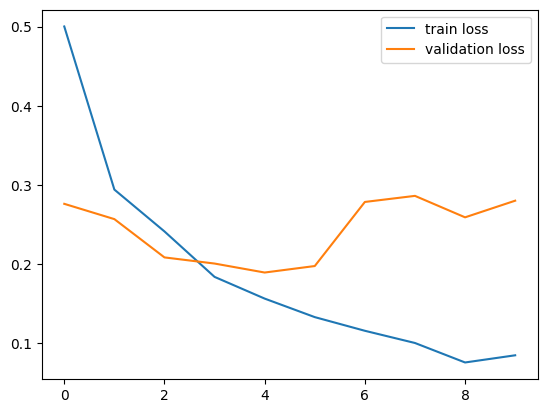

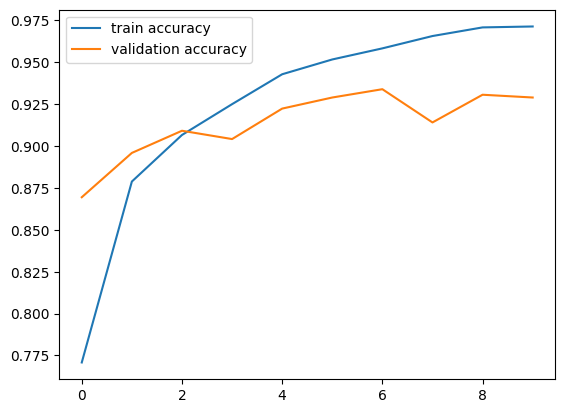

In [42]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/mockup-22756f3d.jpg


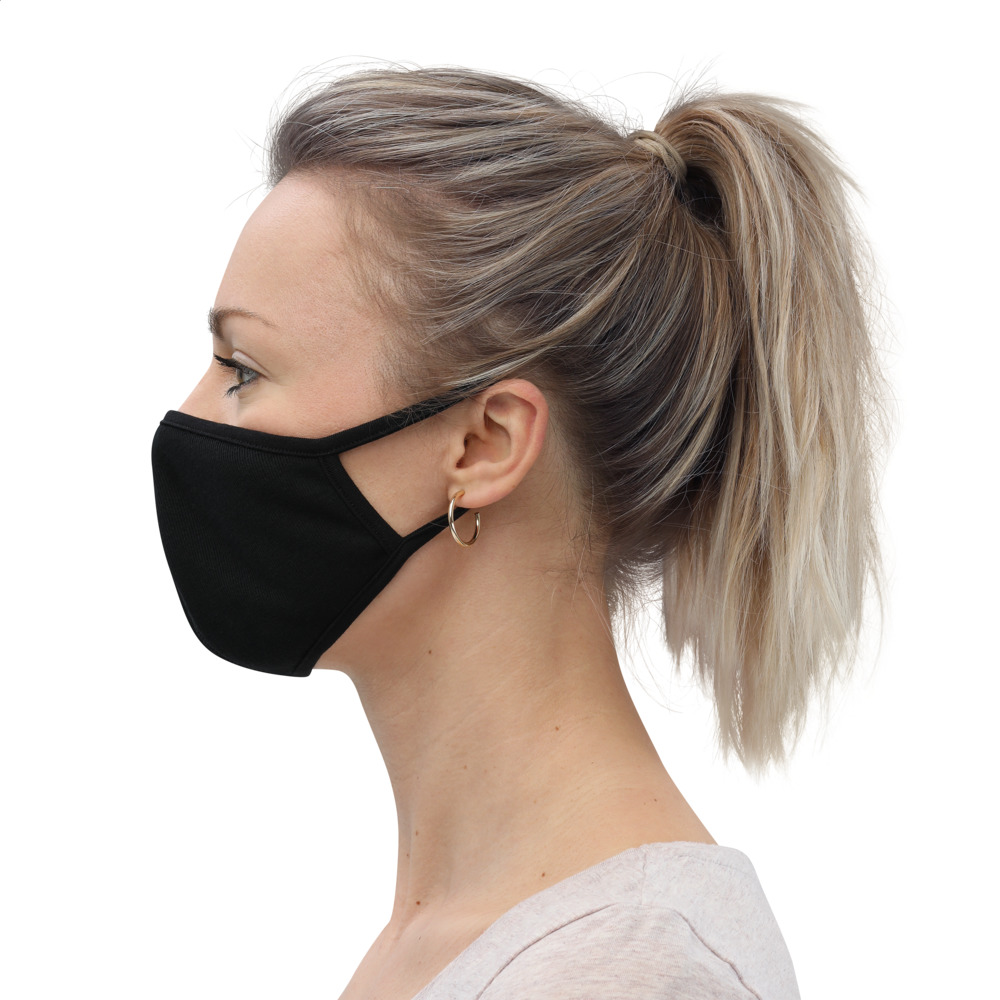

1/1 [==============================] - 0s 28ms/step
[[0.46627614 0.710993  ]]
1
The person in the image is wearing a mask


In [46]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')